# Genesis4 Benchmark on Perlmutter (NERSC)

HPC systems often have special commands to invoke MPI jobs. NERSC uses slurm, which provides `srun` in place of `mpirun`.

In [1]:
from genesis.version4 import Genesis4
import os

The `MPI_RUN` class attribut needs to be replaced. 

In [2]:
#Genesis4.COMMAND = '/path/to/genesis4'
#Genesis4.COMMAND_MPI = '/path/to/genesis4'
Genesis4.MPI_RUN = 'srun -n {nproc} --ntasks-per-node {nproc} -c 1 {command_mpi}'

Additionally, the working directory must be on the scratch disk:

In [3]:
WORKDIR = os.path.expandvars('$SCRATCH')

Instantiate with this workdir:

In [4]:
FILE = 'data/basic4/cu_hxr.in'
G = Genesis4(FILE, workdir = WORKDIR)

Set up the benchmark

In [5]:
G.input['main'][-1]['zstop'] = 40
#G.input['main'].append({'type':'write', 'field':'end'})
#G.input['main'][-1][ 'field_dump_at_undexit'] = True

Run with MPI

In [6]:
%%time
G.verbose=False
G.nproc = 128
G.run()

CPU times: user 0 ns, sys: 96.3 ms, total: 96.3 ms
Wall time: 8.74 s


# Timing

In [7]:
import time
def time1(nproc):
    t1 = time.time()
    G.verbose=False
    G.nproc = nproc
    G.run()
    dt = time.time() - t1
    return dt

time1(128)

9.868889808654785

In [ ]:
nlist = [ 2**n for n in range(9)]
nlist.reverse()
tlist = []
for n in nlist:
    dt = time1(n)
    tlist.append(dt)
    print(f'{n} cores, {dt:0.1f} s')

In [10]:
nlist, tlist

([256, 128, 64, 32, 16, 8, 4, 2, 1],
 [11.364259004592896,
  8.756781578063965,
  15.518342971801758,
  27.61109709739685,
  48.553008794784546,
  95.51237463951111,
  182.06347823143005,
  361.24336671829224,
  556.2742402553558])

# Some saved stats

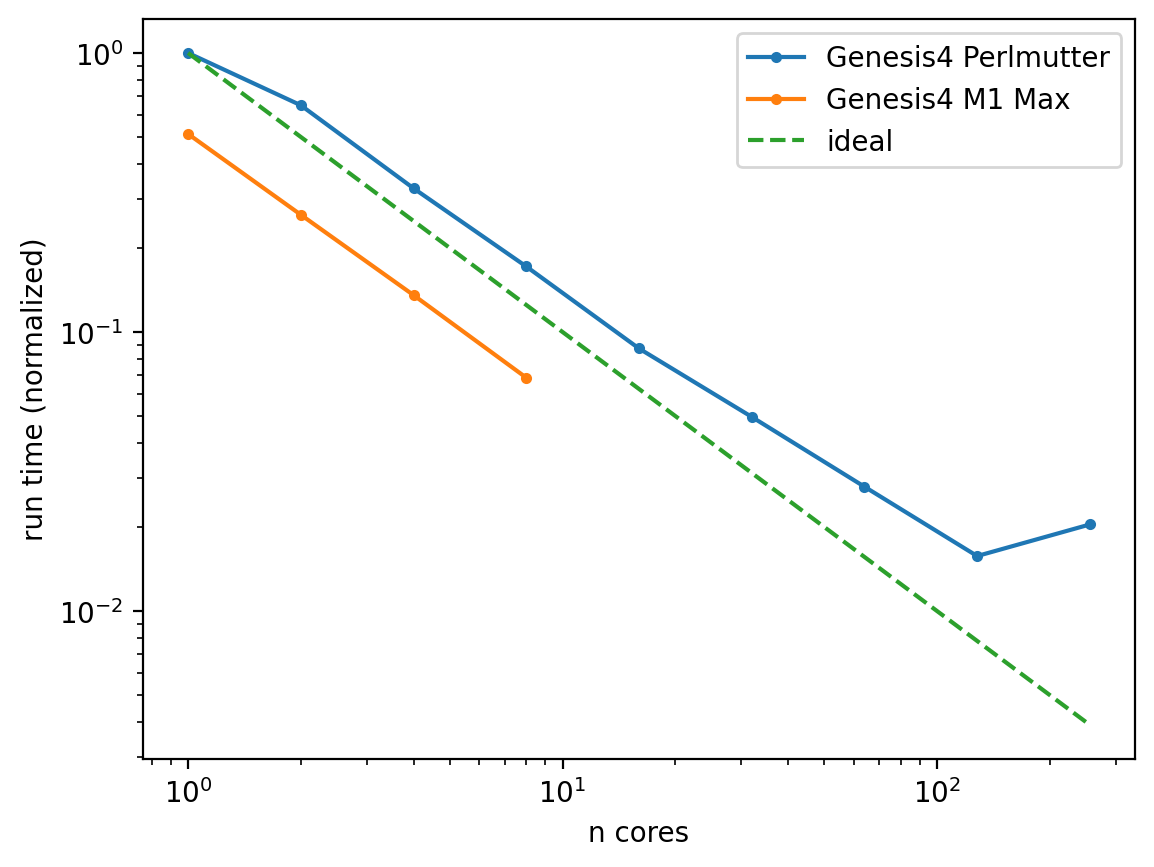

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Perlmutter
nlist, tlist = ([256, 128, 64, 32, 16, 8, 4, 2, 1],
 [11.364259004592896,
  8.756781578063965,
  15.518342971801758,
  27.61109709739685,
  48.553008794784546,
  95.51237463951111,
  182.06347823143005,
  361.24336671829224,
  556.2742402553558])
nlist = np.array(nlist)[::-1]
tlist = np.array(tlist)[::-1]

tref = tlist[0]

# M1 Max 
nlistmac, tlistmac =([8, 4, 2, 1],
 [38.151074171066284,
  75.41113114356995,
  146.3512842655182,
  285.11587405204773])
nlistmac = np.array(nlistmac)
tlistmac = np.array(tlistmac)



plt.plot(nlist, tlist/tref, marker='.', label='Genesis4 Perlmutter')
plt.plot(nlistmac, tlistmac/tref,  marker='.', label='Genesis4 M1 Max')
plt.plot(nlist,  1/(nlist/nlist[0]), '--', label='ideal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n cores')
plt.ylabel('run time (normalized)')
plt.legend()